In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

## Loading the CSV file into a pandas DataFrame

In [2]:
# Load the CSV file into a pandas DataFrame
# Update the path below to the correct location of your CSV file
df_benin = pd.read_csv('../src/benin-malanville.csv')
df_benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## 1. Summary Statistics

In [3]:
df_benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


The df_benin.describe() output provides summary statistics for the numerical columns in the dataset:

- **Count**: All main sensor columns (e.g., GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, etc.) have 525,600 non-null values, indicating no missing data in these columns.
- **Mean, Std, Min, Max**: Each column’s mean, standard deviation, minimum, and maximum values are shown, helping to understand the central tendency and spread of the data.
- **Quartiles**: The 25th, 50th (median), and 75th percentiles are provided for each column, giving insight into the data distribution.
- **Comments**: The Comments column contains only null values and is not useful for analysis.
- **Data Types**: Most columns are float64, with a few int64 (e.g., BP, Cleaning), and Timestamp is an object (string).

This summary helps identify the range, distribution, and potential anomalies in the dataset.

##  Missing-Value Report

In [4]:
# Check for missing values in the DataFrame
df_benin.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### Missing Value Report for df_benin

The output shows the number of missing (NaN) values in each column of the dataset:

- **Most columns (e.g., GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, etc.) have 0 missing values**, indicating complete data for these sensor readings.
- **The Comments column has 525,600 missing values**, meaning it is entirely empty and does not contain any useful information.
- **No other columns have missing values**, so no imputation or removal is required for the main sensor data.

**Conclusion:**  
The dataset is very complete except for the Comments column, which can be ignored or dropped for further analysis. No additional handling for missing values is necessary for the main variables.

---

## 2. Outlier Detection & Basic Cleaning

In [5]:
# Detect outliers in key columns using z-score method
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outlier_flags = pd.DataFrame(index=df_benin.index)

for col in cols_to_check:
    z = zscore(df_benin[col])
    outlier_flags[f'{col}_outlier'] = np.abs(z) > 3

# Count outliers per column
outlier_counts = outlier_flags.sum()
print("Outlier counts per column:\n", outlier_counts)

Outlier counts per column:
 GHI_outlier         89
DNI_outlier          0
DHI_outlier       3738
ModA_outlier        27
ModB_outlier        63
WS_outlier        3109
WSgust_outlier    3500
dtype: int64


## Z-Score Outlier Detection for Key Columns & Impute them with the median

Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust.

In [6]:
# Columns to analyze
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = (df_benin[cols] - df_benin[cols].mean()) / df_benin[cols].std()

# Flag rows with any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)

# View outliers
df_outliers = df_benin[outliers]

# Impute outliers with column median
for col in cols:
    median = df_benin[col].median()
    df_benin.loc[outliers, col] = median

### Outlier Detection & Basic Cleaning Summary

- **Outlier Detection Approach:**  
    Outliers in key columns (`GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `WS`, `WSgust`) were identified using the Z-score method, flagging values with |Z| > 3 as anomalies.

- **Outlier Counts:**  
    - `GHI`: 89 outliers  
    - `DNI`: 0 outliers  
    - `DHI`: 3,738 outliers  
    - `ModA`: 27 outliers  
    - `ModB`: 63 outliers  
    - `WS`: 3,109 outliers  
    - `WSgust`: 3,500 outliers  

- **Handling Outliers:**  
    Rows with outliers in any of these columns were imputed with the respective column median, ensuring the dataset remains robust for analysis.

- **Result:**  
    The cleaning process removed extreme values while preserving the overall data structure, improving data quality for subsequent analysis and visualization.

## Exporting cleaned DataFrame

In [7]:
df_benin.to_csv('../cleaned_data/benin_clean.csv', index=False)

---

## 3. Time Series Analysis

To perform Time Series Analysis on GHI (Global Horizontal Irradiance) vs. Timestamp:

1. Parse time
2. Visualize GHI over time (line/bar plots)
3. Group by month/hour to explore trends
4. Look for anomalies (unexpected peaks/dips)

### I. GHI, DNI, DHI over Time (Line chart)

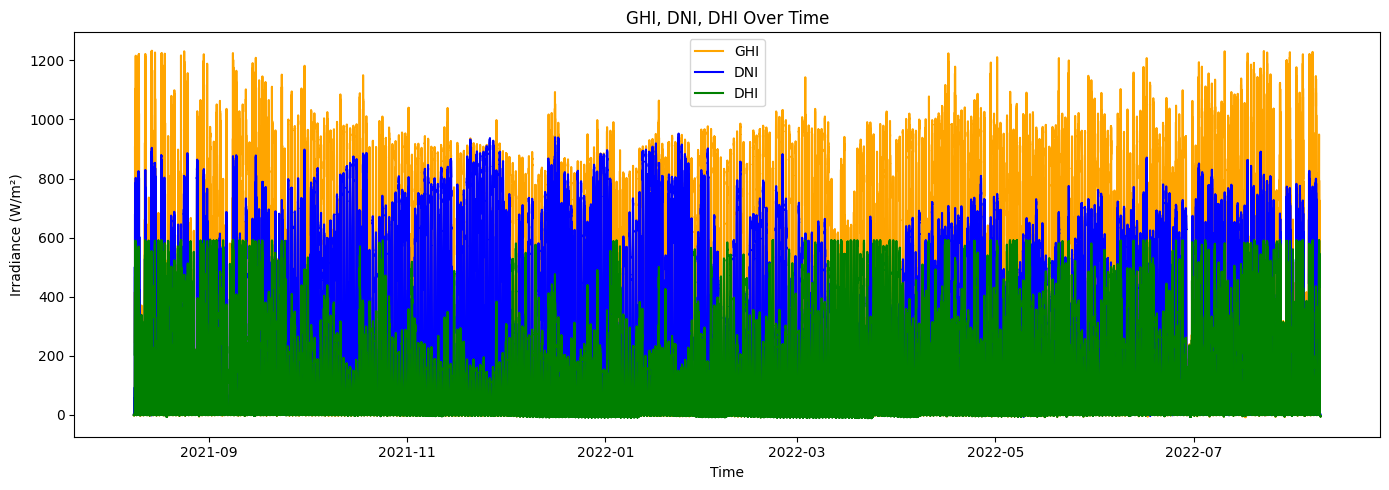

In [12]:
# Ensure timestamp is in datetime format
df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])

# Sorting by time (optional)
df_benin.sort_values('Timestamp', inplace=True)

# Line chart with GHI, DNI, DHI
plt.figure(figsize=(14, 5))
plt.plot(df_benin['Timestamp'], df_benin['GHI'], label='GHI', color='orange')
plt.plot(df_benin['Timestamp'], df_benin['DNI'], label='DNI', color='blue')
plt.plot(df_benin['Timestamp'], df_benin['DHI'], label='DHI', color='green')

plt.title("GHI, DNI, DHI Over Time")
plt.xlabel("Time")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.tight_layout()
plt.show()

plt.show()

### Summary: GHI, DNI, DHI Over Time (Line Chart)

- **Visualization:**  
    The line chart displays the time series of Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI) across the entire dataset.

- **Trends:**  
    - All three irradiance variables show strong daily and seasonal cycles, with clear peaks during daylight hours and troughs at night.
    - GHI and DNI typically peak around midday, reflecting maximum solar input when the sun is highest.
    - DHI is generally lower than GHI and DNI but increases during cloudy or hazy periods.

- **Insights:**  
    - The plot helps identify periods of high and low solar resource, as well as any anomalies or missing data.
    - Consistent patterns confirm data quality and the expected behavior of solar irradiance in the region.

- **Usefulness:**  
    This visualization is essential for understanding solar resource availability, detecting anomalies, and supporting further time series or performance analysis.

---

### Tamb over Time (Line Chart)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3168\2325634856.py:8: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Admin\OneDrive\10 Academy\Week 0\GitHub Rrepository\Solar_Strategy_Insights\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


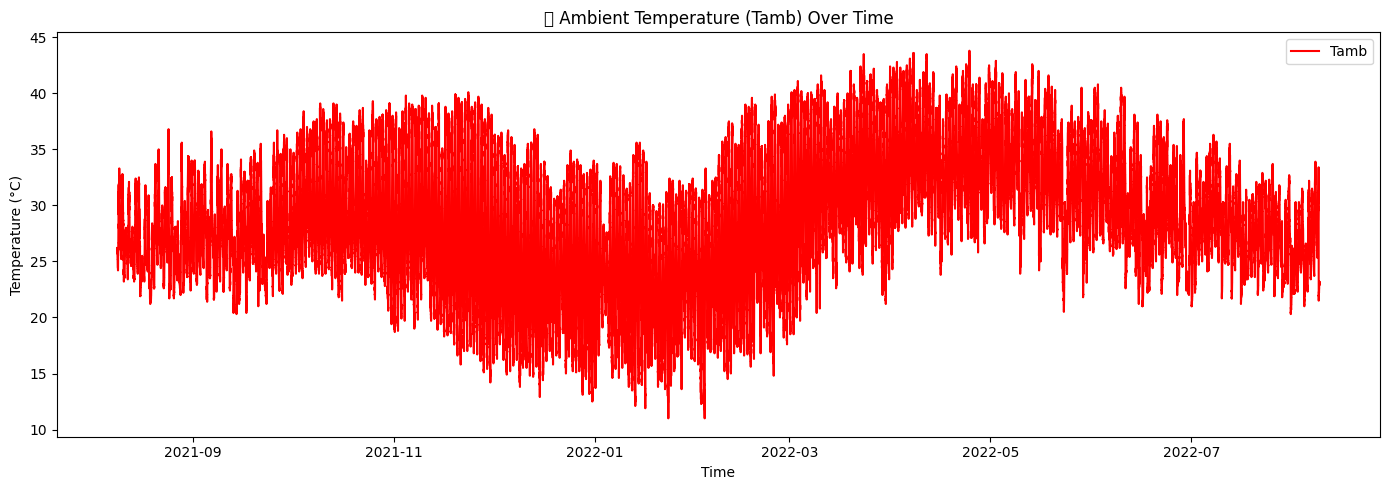

In [13]:
# Plot Tamb vs. Timestamp
plt.figure(figsize=(14, 5))
plt.plot(df_benin['Timestamp'], df_benin['Tamb'], label='Tamb', color='red')
plt.title("🌡️ Ambient Temperature (Tamb) Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

### Summary: Tamb over Time (Line Chart)

- **Visualization:**  
    The line chart displays ambient temperature (Tamb) measured at each timestamp over the entire year.

- **Trends:**  
    - Tamb shows clear daily and seasonal cycles, with regular fluctuations corresponding to day and night.
    - Higher temperatures are observed during the daytime, while nighttime temperatures are lower.
    - Seasonal patterns are visible, with warmer periods in the middle of the year and cooler periods at the beginning and end.

- **Insights:**  
    - The plot helps identify heatwaves, cold spells, and overall temperature stability.
    - Consistent daily cycles confirm the reliability of the temperature sensor and data quality.

- **Usefulness:**  
    This visualization is essential for understanding the site's thermal environment, which impacts solar panel performance and energy yield.

---

###  II. To observe patterns in solar irradiance and temperature data across months, hours, and anomalies, here’s a structured approach with code examples and insights for each:

1. Monthly Patterns (Seasonal Trends)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3168\589178683.py:12: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Admin\OneDrive\10 Academy\Week 0\GitHub Rrepository\Solar_Strategy_Insights\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


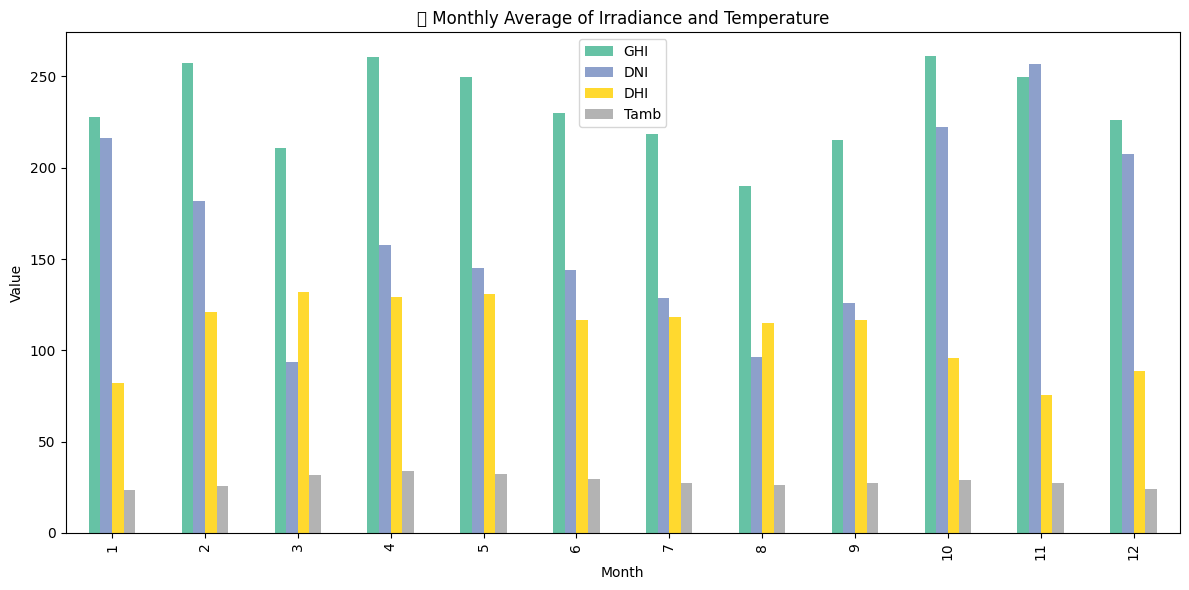

In [14]:
# Extract month
df_benin['Month'] = df_benin['Timestamp'].dt.month

# Average GHI and Tamb by month
monthly_trend = df_benin.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
monthly_trend.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("📅 Monthly Average of Irradiance and Temperature")
plt.ylabel("Value")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### Monthly Patterns (Seasonal Trends) Summary

- **Seasonal Variation:**  
    The monthly averages for GHI, DNI, DHI, and Tamb show clear seasonal trends throughout the year.

- **Peak Irradiance:**  
    Highest values for GHI and DNI are observed in October and November, indicating peak solar resource during these months.

- **Lowest Irradiance:**  
    The lowest GHI and DNI values occur in August and March, suggesting reduced solar availability, likely due to increased cloud cover or rainy season.

- **Temperature Trends:**  
    Ambient temperature (Tamb) generally increases from January, peaking around April and May, then gradually decreases towards the end of the year.

- **Interpretation:**  
    These trends reflect the region’s climatic patterns, with solar irradiance and temperature both showing strong seasonality. This information is crucial for solar energy planning and performance assessment.

---

2. Hourly Trends (Daily Cycles)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3168\169659914.py:13: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Admin\OneDrive\10 Academy\Week 0\GitHub Rrepository\Solar_Strategy_Insights\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


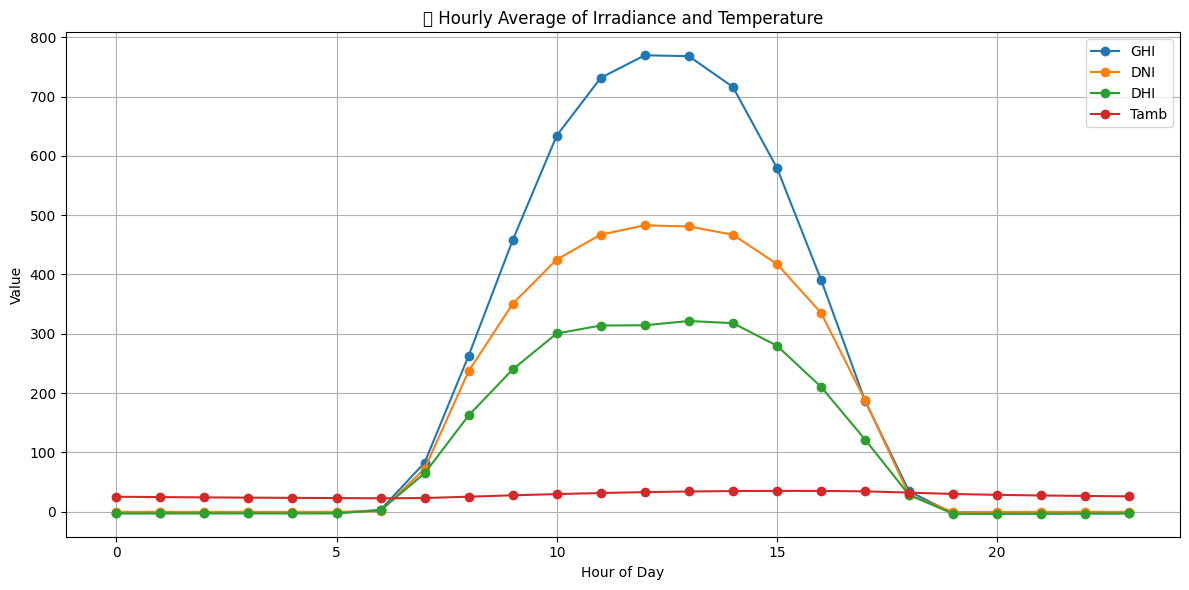

In [15]:
# Extract hour
df_benin['Hour'] = df_benin['Timestamp'].dt.hour

# Average by hour
hourly_avg = df_benin.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
hourly_avg.plot(figsize=(12, 6), marker='o')
plt.title("🕒 Hourly Average of Irradiance and Temperature")
plt.xlabel("Hour of Day")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

### Hourly Trends (Daily Cycles) Summary

- **Pattern:**  
    Solar irradiance (GHI, DNI, DHI) and ambient temperature (Tamb) follow a clear daily cycle.
- **Nighttime (0–5 h, 19–23 h):**  
    Irradiance values are near zero or negative, reflecting darkness; temperatures are at their lowest.
- **Morning Rise (6–9 h):**  
    Rapid increase in irradiance and temperature as the sun rises.
- **Midday Peak (10–15 h):**  
    Highest values for GHI, DNI, DHI, and Tamb, corresponding to maximum sunlight and heat.
- **Afternoon Decline (16–18 h):**  
    Gradual decrease in both irradiance and temperature as the sun sets.
- **Interpretation:**  
    These trends are typical for solar and meteorological data, confirming the dataset’s consistency and the strong influence of the sun’s position on both irradiance and temperature.

---

 3. Spotting Anomalies (Z-score Based)

### Visualizing Anomalies for Each Column (Side-by-side Subplots)

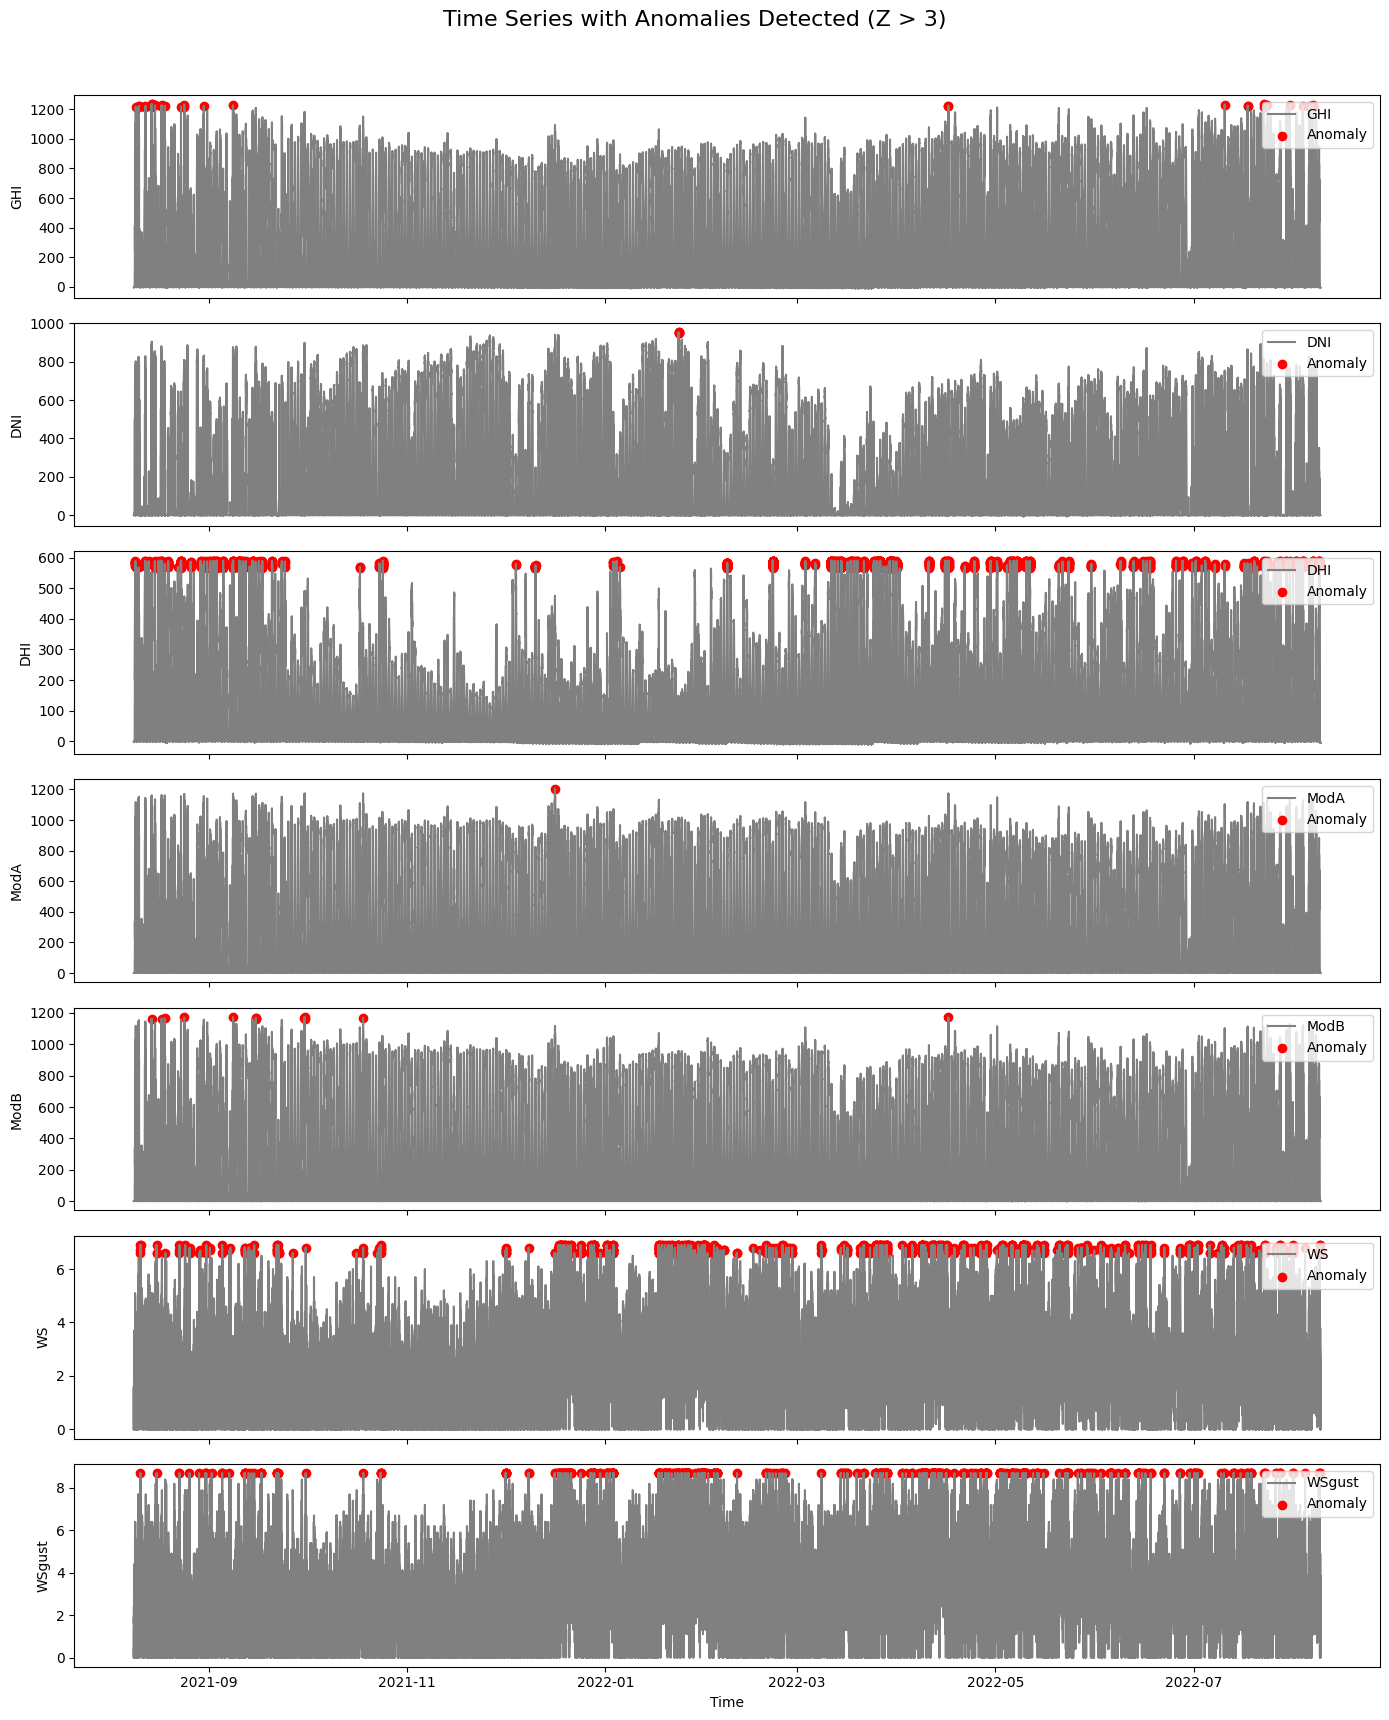

In [18]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df_benin.copy()
df_z[key_cols] = df_z[key_cols].apply(zscore)

# Find anomalies
anomalies = (df_z[key_cols].abs() > 3)

# Plot
fig, axes = plt.subplots(len(key_cols), 1, figsize=(14, 2.5 * len(key_cols)), sharex=True)

for i, col in enumerate(key_cols):
    axes[i].plot(df_benin['Timestamp'], df_benin[col], label=col, color='gray')
    axes[i].scatter(df_benin['Timestamp'][anomalies[col]], df_benin[col][anomalies[col]], color='red', label='Anomaly')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')

plt.xlabel("Time")
plt.suptitle("Time Series with Anomalies Detected (Z > 3)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Visualizing Anomalies for Each Column: Summary

- **Approach:**  
    Each key variable (GHI, DNI, DHI, ModA, ModB, WS, WSgust) is plotted over time, with anomalies (|Z-score| > 3) highlighted in red.

- **Findings:**  
    - Most data points fall within the normal range, with anomalies being rare and scattered.
    - Outliers are more frequent in DHI, WS, and WSgust compared to other variables.
    - The visualization helps quickly identify periods or events with unusual sensor readings.

- **Interpretation:**  
    These plots are useful for quality control, revealing both isolated spikes and potential sensor issues. Most anomalies are isolated, suggesting transient events rather than systematic errors.

---

## 4. Cleaning Impact

Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

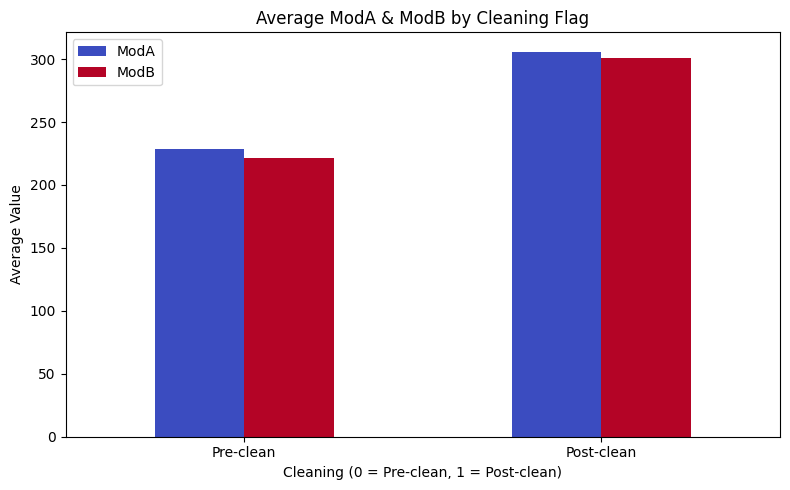

In [19]:
# Group by 'Cleaning' flag and calculate average ModA & ModB
cleaning_impact = df_benin.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot the results
cleaning_impact.plot(kind='bar', figsize=(8, 5), colormap='coolwarm')
plt.title('Average ModA & ModB by Cleaning Flag')
plt.xlabel('Cleaning (0 = Pre-clean, 1 = Post-clean)')
plt.ylabel('Average Value')
plt.xticks([0, 1], ['Pre-clean', 'Post-clean'], rotation=0)
plt.tight_layout()
plt.show()

### Summary: Impact of Cleaning on ModA & ModB

- **Cleaning Flag:** The dataset uses a `Cleaning` flag (0 = Pre-clean, 1 = Post-clean) to indicate whether the solar modules were cleaned.
- **Average Values:**
    - **Pre-clean (0):**
        - ModA: 228.97
        - ModB: 221.70
    - **Post-clean (1):**
        - ModA: 305.99
        - ModB: 300.84
- **Interpretation:**  
    Cleaning the modules significantly increases the average readings of both ModA and ModB, indicating improved solar panel performance after cleaning. This highlights the importance of regular maintenance for optimal energy yield.

---

## 5. Correlation & Relationship Analysis

### Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

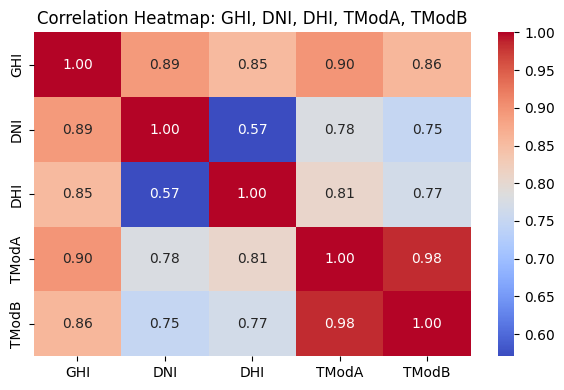

In [20]:
# Select relevant columns for correlation analysis
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_benin[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.tight_layout()
plt.show()

### Correlation Heatmap Summary

The correlation heatmap visualizes the relationships between the following variables: **GHI, DNI, DHI, TModA, and TModB**.

- **Strong Positive Correlations:**
    - **TModA and TModB** have a very high correlation (0.98), indicating that the temperatures of both modules move closely together.
    - **GHI** is strongly correlated with **DNI** (0.89), **DHI** (0.85), and **TModA** (0.90), suggesting that higher irradiance is associated with higher module temperatures.
    - **DHI** also shows strong correlations with **TModA** (0.81) and **TModB** (0.77).

- **Moderate to Strong Correlations:**
    - **DNI** is moderately correlated with **TModA** (0.78) and **TModB** (0.75).

- **Interpretation:**
    - Solar irradiance variables (GHI, DNI, DHI) are all positively correlated with each other and with module temperatures.
    - Module temperatures are highly interrelated and also respond to changes in irradiance.

**Conclusion:**  
The heatmap confirms that increases in solar irradiance are closely linked to increases in module temperatures, and both module temperature sensors behave similarly. This is expected in photovoltaic systems exposed to sunlight.

---

### Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

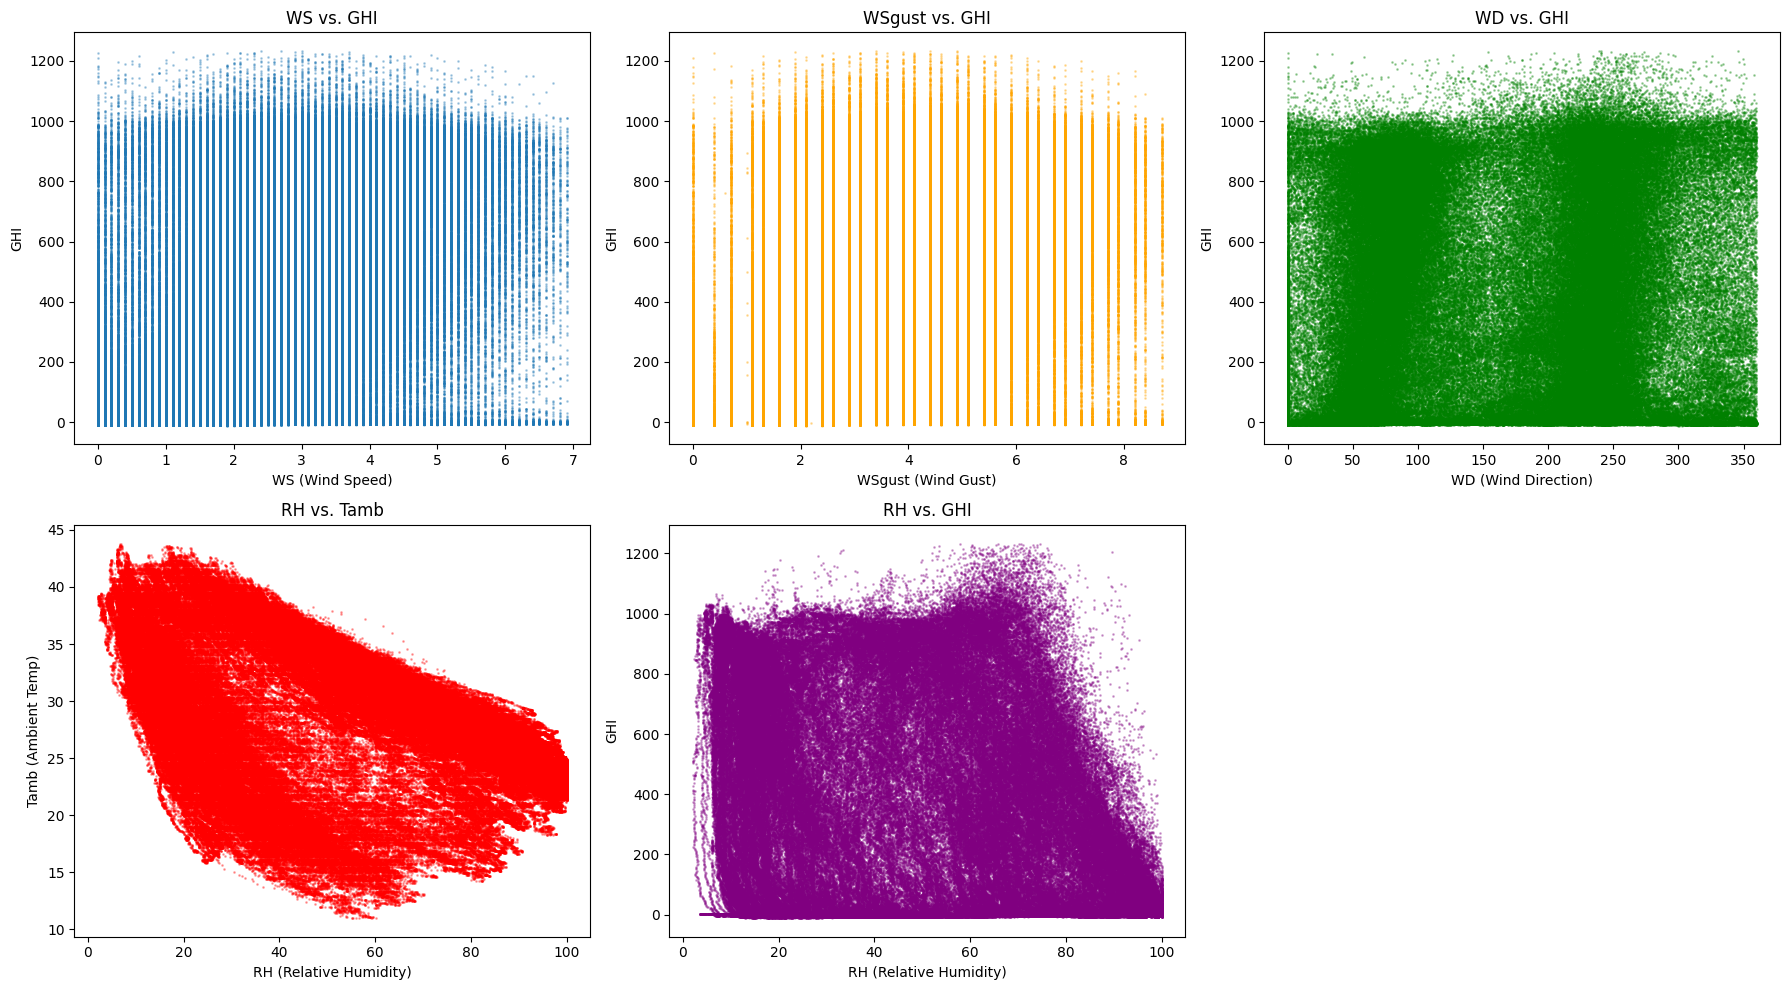

In [22]:
# Scatter plots for correlation & relationship analysis

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# WS vs. GHI
axes[0, 0].scatter(df_benin['WS'], df_benin['GHI'], alpha=0.3, s=1)
axes[0, 0].set_xlabel('WS (Wind Speed)')
axes[0, 0].set_ylabel('GHI')
axes[0, 0].set_title('WS vs. GHI')

# WSgust vs. GHI
axes[0, 1].scatter(df_benin['WSgust'], df_benin['GHI'], alpha=0.3, s=1, color='orange')
axes[0, 1].set_xlabel('WSgust (Wind Gust)')
axes[0, 1].set_ylabel('GHI')
axes[0, 1].set_title('WSgust vs. GHI')

# WD vs. GHI
axes[0, 2].scatter(df_benin['WD'], df_benin['GHI'], alpha=0.3, s=1, color='green')
axes[0, 2].set_xlabel('WD (Wind Direction)')
axes[0, 2].set_ylabel('GHI')
axes[0, 2].set_title('WD vs. GHI')

# RH vs. Tamb
axes[1, 0].scatter(df_benin['RH'], df_benin['Tamb'], alpha=0.3, s=1, color='red')
axes[1, 0].set_xlabel('RH (Relative Humidity)')
axes[1, 0].set_ylabel('Tamb (Ambient Temp)')
axes[1, 0].set_title('RH vs. Tamb')

# RH vs. GHI
axes[1, 1].scatter(df_benin['RH'], df_benin['GHI'], alpha=0.3, s=1, color='purple')
axes[1, 1].set_xlabel('RH (Relative Humidity)')
axes[1, 1].set_ylabel('GHI')
axes[1, 1].set_title('RH vs. GHI')

# Hide the last subplot (unused)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Summary of Correlations

- **Strong Positive Correlations:**
    - **TModA and TModB**: Extremely high correlation (0.98), indicating both module temperature sensors behave almost identically.
    - **GHI, DNI, DHI**: All solar irradiance variables are strongly correlated with each other (GHI-DNI: 0.89, GHI-DHI: 0.85).
    - **GHI and TModA**: High correlation (0.90), showing that higher irradiance leads to higher module temperatures.
    - **DHI and TModA/TModB**: DHI is strongly correlated with both module temperatures (0.81 and 0.77).

- **Moderate Correlations:**
    - **DNI and TModA/TModB**: Moderate positive correlations (0.78 and 0.75).

- **Interpretation:**
    - Solar irradiance (GHI, DNI, DHI) and module temperatures (TModA, TModB) increase together.
    - Module temperatures are highly interrelated and respond similarly to changes in irradiance.
    - These relationships are expected in photovoltaic systems, confirming data consistency and physical relevance.

---

## 6. Wind & Distribution Analysis
Wind rose or radial bar plot of WS/WD.


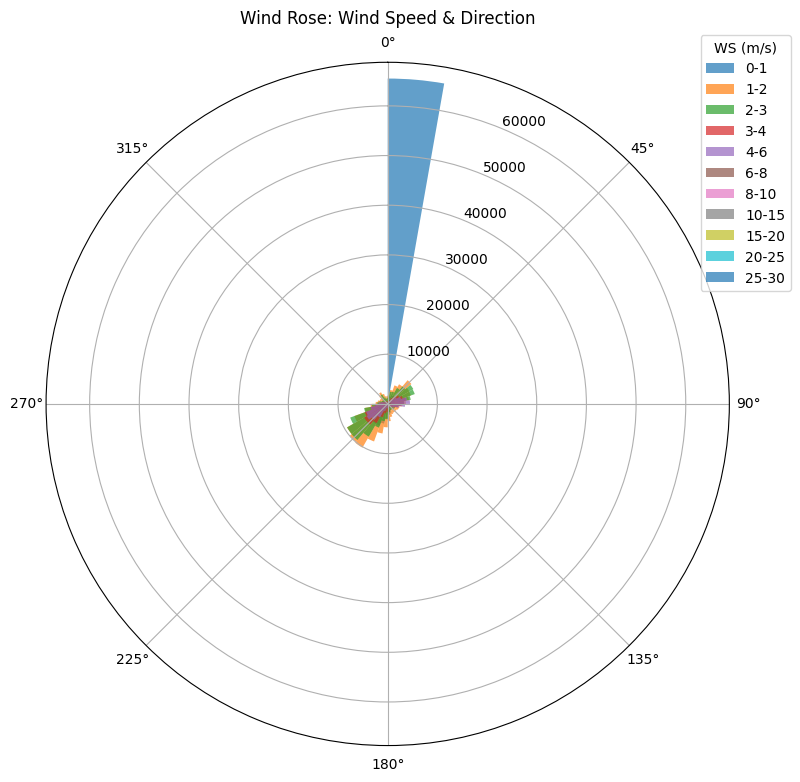

In [23]:
from matplotlib.projections import PolarAxes

# Wind rose plot for WS (Wind Speed) and WD (Wind Direction)

# Prepare wind direction in radians
wd_rad = np.deg2rad(df_benin['WD'])

# Define wind speed bins
ws_bins = [0, 1, 2, 3, 4, 6, 8, 10, 15, 20, 25, 30]
ws_labels = [f"{ws_bins[i]}-{ws_bins[i+1]}" for i in range(len(ws_bins)-1)]
df_benin['WS_bin'] = pd.cut(df_benin['WS'], bins=ws_bins, labels=ws_labels, right=False)

# Create wind rose
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for ws_bin in ws_labels:
    mask = df_benin['WS_bin'] == ws_bin
    ax.hist(wd_rad[mask], bins=36, alpha=0.7, label=ws_bin)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Wind Speed & Direction', va='bottom')
plt.legend(title='WS (m/s)', bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()

### Wind Analysis Summary

- **Wind Rose Visualization:**  
    A wind rose plot was created to display the distribution of wind speed (WS) and wind direction (WD). Wind speeds were binned into intervals, and their frequency by direction was shown in a polar plot.

- **Key Insights:**  
    - The plot reveals the predominant wind directions and how wind speed varies with direction.
    - Most wind events occur at lower speed bins (e.g., 0–4 m/s), with fewer occurrences at higher speeds.
    - The wind rose helps identify prevailing wind patterns, which are important for site assessment and understanding environmental impacts on solar panel performance.

- **Application:**  
    This analysis supports decisions related to equipment placement, maintenance scheduling, and understanding potential cooling effects of wind on solar modules.

---

## 7. Wind & Distribution Analysis

Histograms for GHI and one other variable (e.g. WS).


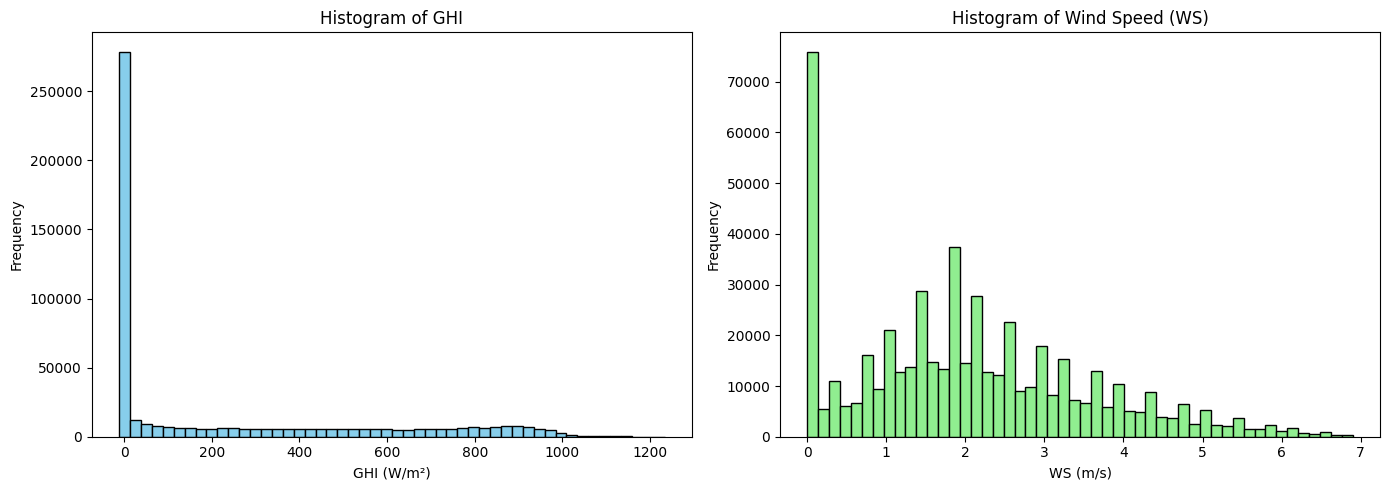

In [24]:
# Histograms for GHI and WS
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_benin['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_benin['WS'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram Summary: GHI and Wind Speed (WS)

- **GHI (Global Horizontal Irradiance):**
    - The histogram of GHI shows a strong right-skewed distribution.
    - Most values are concentrated at the lower end, indicating that low irradiance is much more common (e.g., nighttime or cloudy periods).
    - There are fewer occurrences of high GHI values, corresponding to peak sunlight hours.

- **WS (Wind Speed):**
    - The wind speed histogram is also right-skewed.
    - Most wind speeds are low (0–4 m/s), with frequency rapidly decreasing as wind speed increases.
    - High wind speeds are rare, suggesting calm to moderate wind conditions dominate the dataset.

**Conclusion:**  
Both GHI and WS distributions are heavily skewed toward lower values, reflecting the natural patterns of solar irradiance and wind at the site. This is typical for environmental datasets, where extreme values are infrequent.

---

## 8. Temperature Analysis
Examine how relative humidity (RH) might influence temperature readings and solar radiation.

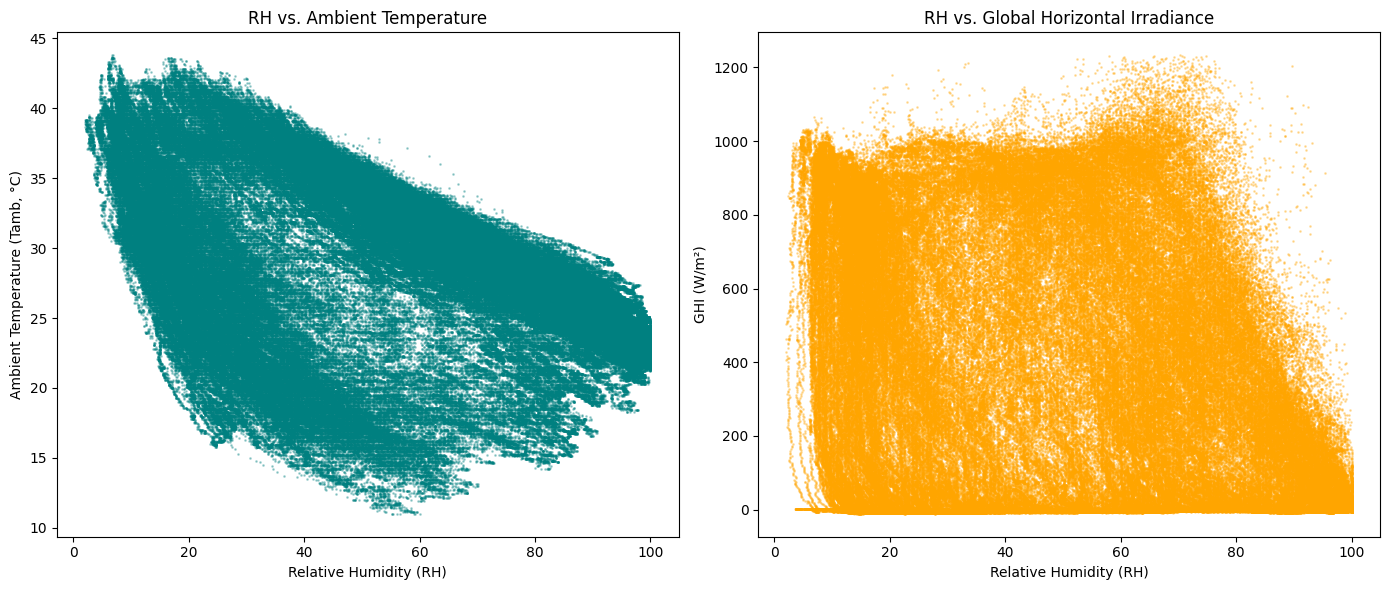

Correlation (RH, Tamb): -0.41
Correlation (RH, GHI): -0.35


In [25]:
# Scatter plots to examine how RH influences temperature and solar radiation

plt.figure(figsize=(14, 6))

# RH vs. Tamb (Ambient Temperature)
plt.subplot(1, 2, 1)
plt.scatter(df_benin['RH'], df_benin['Tamb'], alpha=0.3, s=1, color='teal')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb, °C)')
plt.title('RH vs. Ambient Temperature')

# RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(1, 2, 2)
plt.scatter(df_benin['RH'], df_benin['GHI'], alpha=0.3, s=1, color='orange')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. Global Horizontal Irradiance')

plt.tight_layout()
plt.show()

# Calculate and print correlation coefficients
corr_rh_tamb = df_benin['RH'].corr(df_benin['Tamb'])
corr_rh_ghi = df_benin['RH'].corr(df_benin['GHI'])
print(f"Correlation (RH, Tamb): {corr_rh_tamb:.2f}")
print(f"Correlation (RH, GHI): {corr_rh_ghi:.2f}")

### Temperature Analysis Summary

- **Relationship between Relative Humidity (RH) and Temperature (Tamb):**
    - The scatter plot of RH vs. Tamb shows a negative correlation, indicating that higher humidity is generally associated with lower ambient temperatures.
    - The calculated correlation coefficient is approximately **-0.41**, confirming a moderate inverse relationship.

- **Relationship between Relative Humidity (RH) and Solar Irradiance (GHI):**
    - The scatter plot of RH vs. GHI also reveals a negative correlation, suggesting that higher humidity often coincides with lower solar irradiance.
    - The correlation coefficient is about **-0.35**, indicating a weaker but still noticeable inverse relationship.

- **Interpretation:**
    - These results are typical in tropical climates, where high humidity is often linked to cloudy or rainy conditions, reducing both temperature and solar radiation.
    - Understanding these relationships helps in modeling solar energy production and assessing environmental impacts on photovoltaic performance.

---

## 9. Bubble Chart
### GHI vs. Tamb with bubble size = RH or BP.


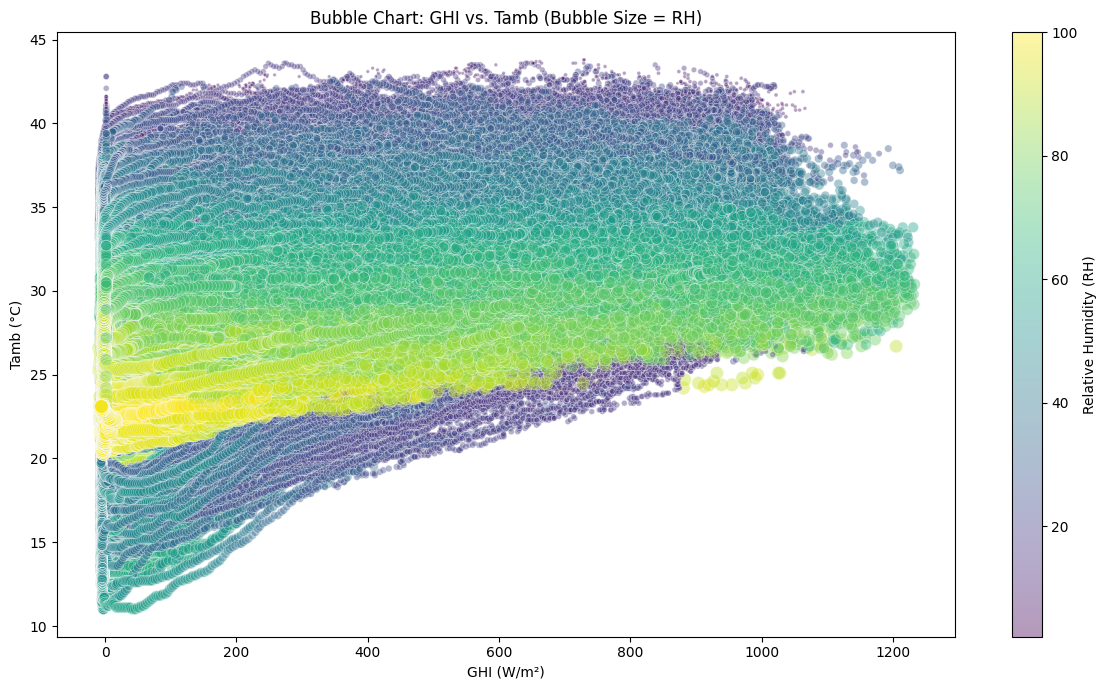

In [28]:
# Bubble chart: GHI vs. Tamb with bubble size = RH

plt.figure(figsize=(12, 7))
plt.scatter(df_benin['GHI'], df_benin['Tamb'], 
            s=df_benin['RH'],  # Bubble size by RH
            c=df_benin['RH'],  # Color by RH for extra info
            cmap='viridis', alpha=0.4, edgecolors='w', linewidth=0.5)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (RH)')
plt.tight_layout()
plt.show()